In [1]:
# import the all necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
data = pd.merge(customers, transactions, on="CustomerID")

In [11]:
agg_transactions = transactions.groupby("CustomerID").agg({
    "Price": ["sum", "mean", "count"],  # Replace with the correct column name
}).reset_index()
agg_transactions.columns = ["CustomerID", "TotalSpent", "AvgSpent", "TransactionCount"]


In [12]:
# Merge back with customer profile data
data = pd.merge(customers, agg_transactions, on="CustomerID")

In [29]:

# Select features for clustering
features = data[["Region", "CustomerID", "TotalSpent", "AvgSpent", "TransactionCount"]]


In [30]:
# Handle missing values (if any)
features = features.fillna(features.mean())

C:\Users\amanp\AppData\Local\Temp/ipykernel_12144/3269358345.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features = features.fillna(features.mean())


In [34]:
print(features.dtypes)


Region               object
CustomerID           object
TotalSpent          float64
AvgSpent            float64
TransactionCount      int64
dtype: object


In [35]:
features = pd.get_dummies(features, drop_first=True)


In [37]:
features = features.select_dtypes(include=[np.number])


In [38]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [39]:
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

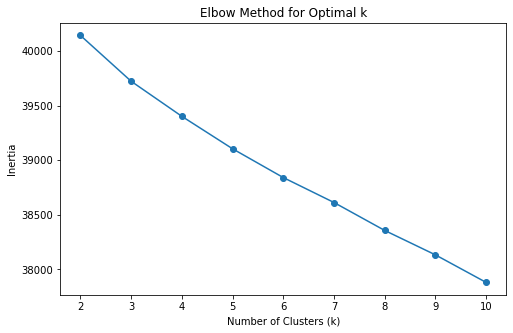

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [41]:
# Fit K-Means with chosen k (e.g., k=4)
k = 4  # Set this based on the Elbow Method or other criteria
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [42]:
# Add cluster labels to the data
data["Cluster"] = clusters


In [43]:
# Evaluate Clustering
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")

Davies-Bouldin Index: 7.33


In [44]:
# Silhouette Score
sil_score = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.01


In [45]:
# Visualize Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
data["PCA1"] = reduced_features[:, 0]
data["PCA2"] = reduced_features[:, 1]

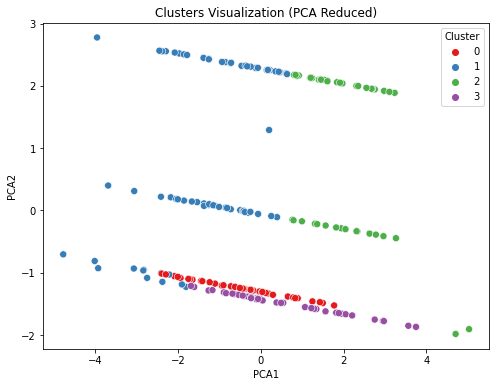

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=data, palette="Set1", s=50)
plt.title("Clusters Visualization (PCA Reduced)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()